# Analysing the posts about Justin Trudeau from the Gaurdian Media Group API

This task in structured as follows:

    - Step1: Data Extraction : 
News articles about Justin Trudeau are collected by requesting the Gaurdian Media Group API. A connection is established to this API service with help of a python script. 
    - Step 2: Modeling: 
Once the data is stored in the system, it will be ingested into a pandas dataframe and then the basic perprocessing steps will be carried out. 
    - Step3: Visualization: 
Visualization will be carried out using matplotlib library to identify any trends, patterns or any unusal events. 
    - Step 4: Automation : 
Finally we automate the script to get data daily from the API and plot the evolution plot which can be sent to a recipient. The deiscription to this step is explained in detailed in the "AutomatedTask.pdf" file

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates
import json
import requests
from os import makedirs
from os.path import join, exists

# Data Extraction from Gaurdian API

Extracting news articles about Justin Tredeau from Jan 2018 till date is achieved by sending requests to "http://content.guardianapis.com/search" and also providing some filter parameters along with the API Key. 


The block of code below sends requests to the API Endpoint, loops over each page and collects the data depending on the filter parameters and finally dumps the data into a json file.

In [58]:
MY_API_KEY = "d79fb530-f2d7-40f0-bbe3-addae67b4387"
API_ENDPOINT = 'http://content.guardianapis.com/search'

ARTICLES_DIR = join('scrapdata', 'articles')
makedirs(ARTICLES_DIR, exist_ok=True)
fname = join(ARTICLES_DIR, 'justin' + '.json')
my_params = {
    'q':'"Justin Trudeau"',
    'from-date': "2018-01-01",
    'to-date': "2020-01-30",
    'order-by': "newest",
    'page-size': 100,
    'api-key': MY_API_KEY
}
all_results = []
current_page = 1
total_pages = 1
while current_page <= total_pages:
    my_params['page'] = current_page
    resp = requests.get(API_ENDPOINT, my_params)
    data = resp.json()
    all_results.extend(data['response']['results'])
    current_page += 1
    total_pages = data['response']['pages']
    with open(fname, 'w') as f:
            print("Writing from page", current_page-1)
            f.write(json.dumps(all_results, indent=2))

Writing from page 1
Writing from page 2
Writing from page 3
Writing from page 4
Writing from page 5
Writing from page 6


In [59]:
len(all_results)

523

Next we ingest the json file into a dataframe for performing analysis

In [60]:
with open('scrapdata/articles/justin.json') as f:
    d = json.load(f)
df = pd.io.json.json_normalize(d)
df.columns = df.columns.map(lambda x: x.split(".")[-1])

In [61]:
df

,apiUrl,id,isHosted,pillarId,pillarName,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl
0,https://content.guardianapis.com/business/2020...,business/2020/jan/24/what-did-we-learn-from-da...,False,pillar/news,News,business,Business,article,2020-01-24T15:45:52Z,What did we learn from Davos 2020?,https://www.theguardian.com/business/2020/jan/...
1,https://content.guardianapis.com/world/2020/ja...,world/2020/jan/22/one-third-canada-prisoners-i...,False,pillar/news,News,world,World news,article,2020-01-22T18:03:04Z,'National travesty': report shows one third of...,https://www.theguardian.com/world/2020/jan/22/...
2,https://content.guardianapis.com/technology/20...,technology/2020/jan/21/meng-wanzhou-huawei-cfo...,False,pillar/news,News,technology,Technology,article,2020-01-21T21:57:20Z,Huawei CFO's extradition would let US criminal...,https://www.theguardian.com/technology/2020/ja...
3,https://content.guardianapis.com/business/live...,business/live/2020/jan/21/davos-2020-donald-tr...,False,pillar/news,News,business,Business,liveblog,2020-01-21T19:47:33Z,Davos 2020: Greta demands climate action but T...,https://www.theguardian.com/business/live/2020...
4,https://content.guardianapis.com/world/2020/ja...,world/2020/jan/20/huawei-executive-meng-wanzho...,False,pillar/news,News,world,World news,article,2020-01-20T16:27:03Z,Huawei executive's extradition hearing to star...,https://www.theguardian.com/world/2020/jan/20/...
5,https://content.guardianapis.com/world/2020/ja...,world/2020/jan/18/iran-to-send-crashed-planes-...,False,pillar/news,News,world,World news,article,2020-01-18T17:05:40Z,Iran to send crashed plane's flight recorders ...,https://www.theguardian.com/world/2020/jan/18/...
6,https://content.guardianapis.com/uk-news/2020/...,uk-news/2020/jan/16/prince-harry-makes-first-p...,False,pillar/news,News,uk-news,UK news,article,2020-01-16T13:06:01Z,Prince Harry makes first public appearance sin...,https://www.theguardian.com/uk-news/2020/jan/1...
7,https://content.guardianapis.com/world/2020/ja...,world/2020/jan/14/canada-trump-foreign-policy-...,False,pillar/news,News,world,World news,article,2020-01-15T08:11:21Z,Iran crash: Canadians feel like collateral dam...,https://www.theguardian.com/world/2020/jan/14/...
8,https://content.guardianapis.com/fashion/2020/...,fashion/2020/jan/15/scientists-cite-parasite-f...,False,pillar/lifestyle,Lifestyle,fashion,Fashion,article,2020-01-15T00:01:48Z,Women repulsed by lice and fleas less likely t...,https://www.theguardian.com/fashion/2020/jan/1...
9,https://content.guardianapis.com/uk-news/2020/...,uk-news/2020/jan/14/meghan-did-not-take-part-i...,False,pillar/news,News,uk-news,UK news,article,2020-01-14T18:52:28Z,Sussexes decided 'not necessary' for Meghan to...,https://www.theguardian.com/uk-news/2020/jan/1...


# Data Cleaning and Modelling

For each articles the following fieldsw will be retained:
- apiURL
- PillarName
- SectionName
- type
- webPublicationDate
- webTitle
- webUrl

As part of the data cleaing phase the following steps are performed: 

- Step 1: As the first step, all the variables except the one's mentioned above are deleted.
- Step 2: The date variable "webPublicationDate" is converted to a Datetime object, as it will be usefull in further analysis. Further this variable will be splitted into 2 variables to contain the information about "Date" and "Time" separately, as it will be used later to compute the number of articles published per day. 

In [62]:
df_new = df.drop(['id','isHosted','pillarId','sectionId'] , axis = 1)
df_new.dtypes

apiUrl                object
pillarName            object
sectionName           object
type                  object
webPublicationDate    object
webTitle              object
webUrl                object
dtype: object

In [66]:
df_new['webPublicationDate'] = pd.to_datetime(df_new['webPublicationDate'])

In [67]:
df_new['Date'] = [d.date() for d in df_new['webPublicationDate']]
df_new['Date'] = pd.to_datetime(df_new['Date'])

In [68]:
df_new['No of articles'] = int(1)
df_new.dtypes

apiUrl                        object
pillarName                    object
sectionName                   object
type                          object
webPublicationDate    datetime64[ns]
webTitle                      object
webUrl                        object
Date                  datetime64[ns]
No of articles                 int64
dtype: object

# Data Analysis and Visualization

Next step is analysing the frequency of articles published by date. 

The block of code below groups the articles by year and plots the count i.e "No of articles". 

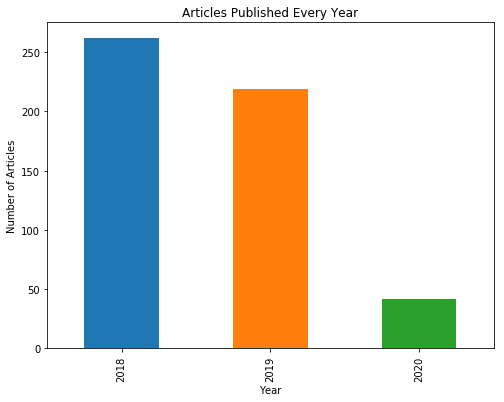

In [69]:
ax = df_new.groupby(df_new.Date.dt.year)['webTitle'].count().plot(kind='bar', figsize=(8, 6))
ax.set(xlabel='Year', ylabel='Number of Articles', title="Articles Published Every Year")
plt.show()

Similarly, graphs for months and weekdays are plotted

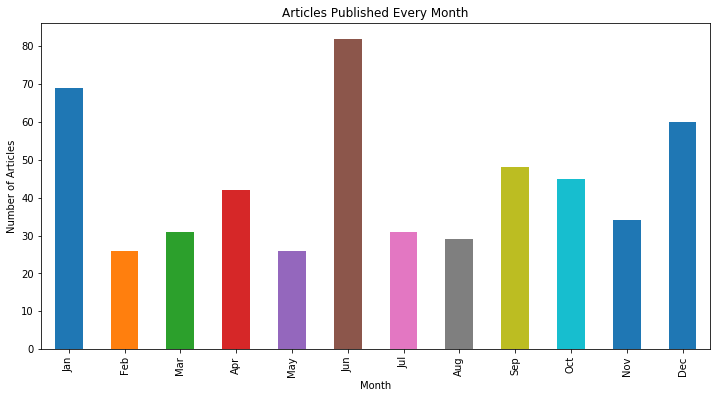

In [70]:
ax = df_new.groupby(df_new.Date.dt.month)['webTitle'].count().plot(kind='bar', figsize=(12, 6))
months = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']

ax.set_xticklabels(months)
ax.set(xlabel='Month', ylabel='Number of Articles', title="Articles Published Every Month")


plt.show()

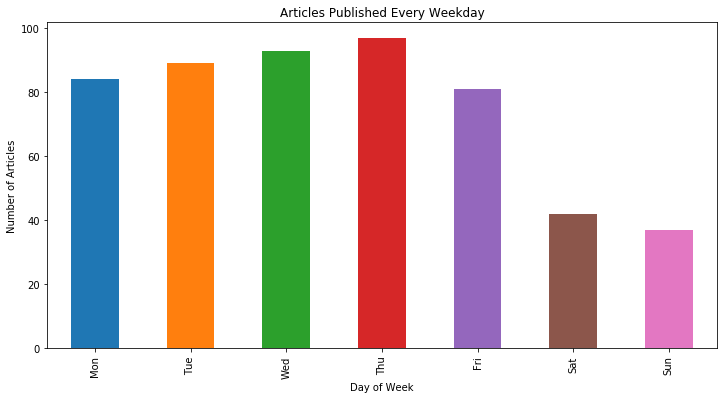

In [71]:
ax = df_new.groupby(df_new.Date.dt.weekday)['webTitle'].count().plot(kind='bar', figsize=(12, 6))
weekdays = ['Mon' , 'Tue' ,'Wed' , 'Thu' , 'Fri' , 'Sat' , 'Sun']

ax.set_xticklabels(weekdays)
ax.set(xlabel='Day of Week', ylabel='Number of Articles', title="Articles Published Every Weekday")
plt.show()

- Highest number of artciles about Jusin Trudeau were published in the year 2018. 

- The month of June witnesses the highest number of publications , which is followed by January

- Thursday is observed to be the busiest day in the week, as compared to others where slightly less articles are published. 

- As expected, on weekends less articels are published. 

Next, the articles are grouped by date and a new dataframe is created to only contain the information about "Date" and "No of articles" 

In [74]:
dataframe = df_new.filter(['Date', 'No of articles'], axis=1)
dataframe.head()

,Date,No of articles
0,2020-01-24,1
1,2020-01-22,1
2,2020-01-21,1
3,2020-01-21,1
4,2020-01-20,1


In [75]:
dataframe = dataframe.groupby(by='Date').agg({'No of articles': 'sum'})
dataframe.head()

,No of articles
Date,
2018-01-01,1
2018-01-03,1
2018-01-10,1
2018-01-19,2
2018-01-22,1


## Daily Average 

As we can see above, on some days we have no articels about Justin Trudeau. In order to calculate the average of articles published daily, we add the missing dates to the dataframe and enter 0 as the "No of articles published" on those days.

In [76]:
dataframe.reset_index(inplace=True)

In [77]:
r = pd.date_range(start = dataframe.Date.min() , end = dataframe.Date.max())
dataframe_new = dataframe.set_index('Date').reindex(r).fillna(0).rename_axis('Date').reset_index()

In [78]:
dataframe_new['No of articles'].mean()

0.6936339522546419

So, on an average 0.7 articles about Justin Trudeau are published daily since 2018.

In [79]:
dataframe_new.describe()

,No of articles
count,754.000000
mean,0.693634
std,1.288538
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,13.000000


## Section Name

Next we will see publication of articles in each of the sections. 

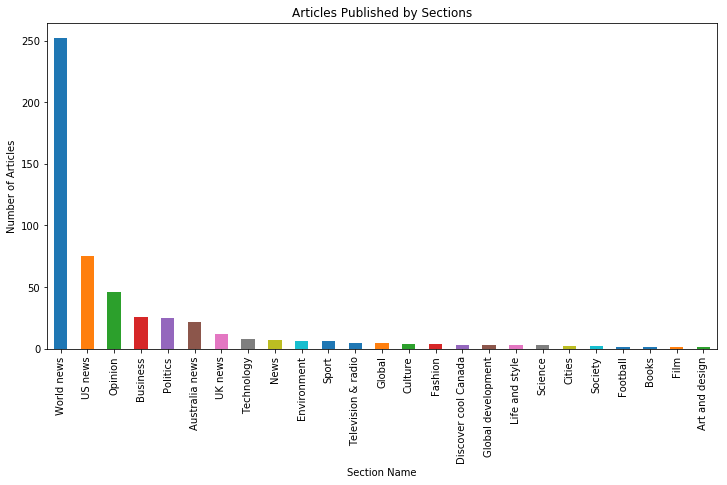

In [80]:
ax = df_new.sectionName.value_counts().plot(kind = 'bar', figsize=(12, 6))
ax.set(xlabel='Section Name', ylabel='Number of Articles', title="Articles Published by Sections")
plt.show()

In [81]:
print(df_new.sectionName.value_counts())

World news              252
US news                  75
Opinion                  46
Business                 26
Politics                 25
Australia news           22
UK news                  12
Technology                8
News                      7
Environment               6
Sport                     6
Television & radio        5
Global                    5
Culture                   4
Fashion                   4
Discover cool Canada      3
Global development        3
Life and style            3
Science                   3
Cities                    2
Society                   2
Football                  1
Books                     1
Film                      1
Art and design            1
Name: sectionName, dtype: int64


As we can see the articles published under the Section Name "World news" dominates all the other articles with a high margin of 252 articles published in total. 

## The evolution of No. of articles over time

In [82]:
dataframe_new.set_index(['Date'], inplace=True)

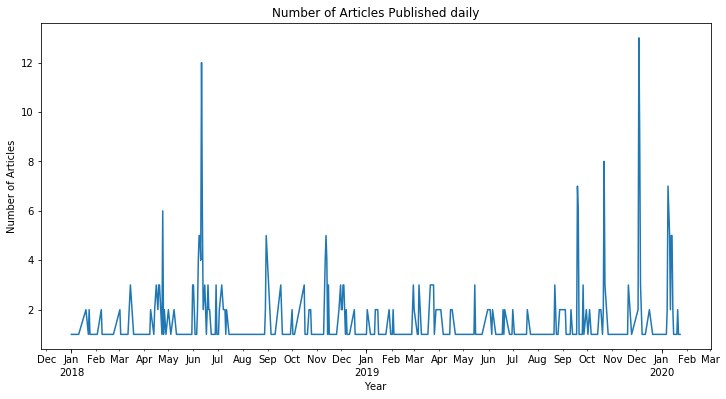

In [83]:
ax = df_new.groupby(df_new.Date.dt.date)['webTitle'].count().plot(kind='line', figsize=(12, 6))
ax.set(xlabel='Year', ylabel='Number of Articles', title="Number of Articles Published daily")

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))


plt.show()

In [84]:
df_new['Date'].value_counts().head(10)

2019-12-04    13
2018-06-11    12
2019-12-05     9
2019-10-22     8
2019-09-19     7
2020-01-09     7
2019-09-20     6
2018-04-24     6
2020-01-10     6
2018-06-12     6
Name: Date, dtype: int64

On ploting the graph of evolution of "No. of articles" over time, we observe the following:

    - Higher number of articles are published on 4th December 2019 and 11th June 2018  with more than 12 articles published on those days.
    
    - An interesting thing observed is that , no articles were pbulished in the entire month of August in the year 2018 as well as in 2019.
    
    - We observe on an average couple of articles being published for most of the time with slightly higher number of articles being published at the end of 2018 and 2019. 

Lets see the dominant words that appeared on the headlines by creating a word cloud.

A file which contains the stopwords is used to identify the stopwords in the articles and not include them in the word cloud. 

In [85]:
from wordcloud import WordCloud
stopwords = set(open('stopwords.txt').read().split(','))

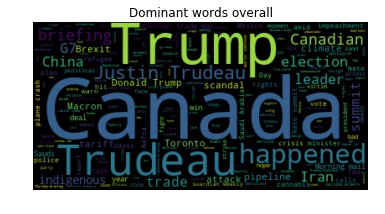

In [86]:
wordcloud = wc.generate(' '.join(df_new['webTitle'].apply(str)))
plt.imshow(wordcloud , interpolation ='bilinear')
plt.axis('off')
plt.title("Dominant words overall")
plt.show()

- Looking at the entire dataframe, the headlines of the published articles are dominated by words like Canada, Trudeau, Trump which suggest most articles are about them.
- Lets see the words that are more dominant on 4th December 2019 and 11th June 2018, the days that observed the highest publications 

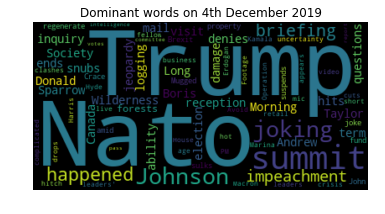

In [87]:
wc = WordCloud(stopwords = stopwords)
wordcloud = wc.generate(' '.join(df_new[df_new.Date == '2019-12-04']['webTitle'].apply(str)))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Dominant words on 4th December 2019")
plt.show()

Trump seems to be dominant in the news on that day. We see keywords like summit, Nato, Johnson joking in the word cloud. 

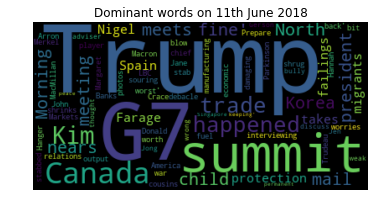

In [88]:
wc = WordCloud(stopwords = stopwords)
wordcloud = wc.generate(' '.join(df_new[df_new.Date == '2018-6-11']['webTitle'].apply(str)))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Dominant words on 11th June 2018")
plt.show()

Trump seems to be dominant in the news on that day. We see keywords like G7, Canada, summit Kim in the word cloud. 